In [1]:
from surface_code_routing.lib_instructions import T_gate, T_Factory
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

import cnot_network

sbs.set_context("paper")
sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

def plt_data(condition, x_axis, y_axis, target=None):
    data = filter(lambda x: x[0] == target, zip(condition, x_axis, y_axis))
    x = []
    y = []
    for _, x_val, y_val in data:
        x.append(x_val)
        y.append(y_val)
    return {'x':x, 'y':y}   

In [2]:
t_factory_l1 = cnot_network.T_Factory()
toffoli_gate = cnot_network.Toffoli
t_factory_l2 = T_Factory(t_factory_l1, height=8, width=10, t_gate=T_gate(t_factory_l1))
t_gate_l2 = T_gate(factory=t_factory_l2)
t_factory_l3 = T_Factory(t_factory_l2, height=11, width=12, t_gate=T_gate(t_factory_l2))
t_gate_l3 = T_gate(factory=t_factory_l3)

t_factories = (t_factory_l1, t_factory_l2, t_factory_l3)

In [3]:
results = {'dist':[], 'runtime':[], 'volume':[], 'size':[]}

for dist, fact in enumerate(t_factories):
    dist += 1
    gate = T_gate(factory=fact)
    for size in range(5, 60):
        try:
            qcb = T_Factory(fact, t_gate=gate, height=size, width=size)
            results['dist'].append(dist)
            results['runtime'].append(qcb.n_cycles())
            results['volume'].append(qcb.space_time_volume())
            results['size'].append(size)
            print("\r Constructed: ", dist, size, " " * 10, flush=True, end='')
            del qcb
        except:
            print("\r Failed: ", dist, size, " " * 10, flush=True, end='')
            pass

results_nest = results

 Constructed:  3 59            1 12            1 13            1 16           

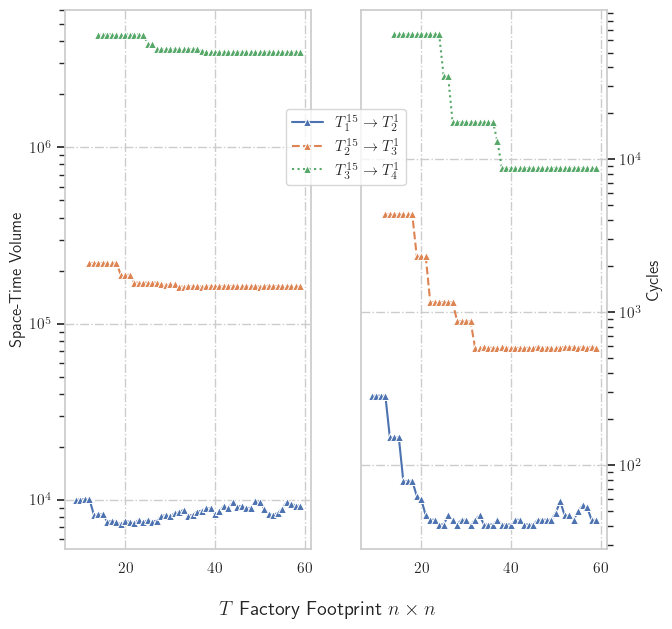

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

#f, ax = plt.subplots(figsize=(7, 7))


sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#plt.grid(True,which="both")  


marks = ['', '.', 'x', '*']
linestyles = ['-', '--', ':']

res = results_nest
targ_key = 'dist'

dependent = 'volume'
independent = 'size'
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

ax = [
    plt.subplot2grid((1, 2), (0, 0), colspan=1),
    plt.subplot2grid((1, 2), (0, 1), colspan=1)
]

subplot = ax[0]
kwargs = {
'errorbar':('ci', 100)
}

for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'DAG$_{target}$',
        linestyle=linestyles[idx],
        marker='^',
        **kwargs
    )


subplot.legend_.remove()
subplot.yaxis.set_label_position("left")
subplot.yaxis.tick_left()
subplot.set_yscale('log')
subplot.set_ylabel('Space-Time Volume')

dependent = 'runtime'

subplot = ax[1]
for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'$T^{{15}}_{{{target}}} \\rightarrow T^{{1}}_{{{target + 1}}}$',
        linestyle=linestyles[idx],
        marker='^',
        **kwargs
    )
    
subplot.legend_.remove()
subplot.yaxis.set_label_position("right")
subplot.yaxis.tick_right()
subplot.set_yscale('log')
subplot.set_ylabel('Cycles')

fig = plt.gcf()
fig.set_size_inches(7, 7)

lines = linestyles * 3

handles, labels = subplot.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper left', bbox_to_anchor=(0.43, 0.75))

fig.supxlabel('$T$ Factory Footprint $n \\times n$')


#plt.savefig('nested_factories_non_greedy.pdf')

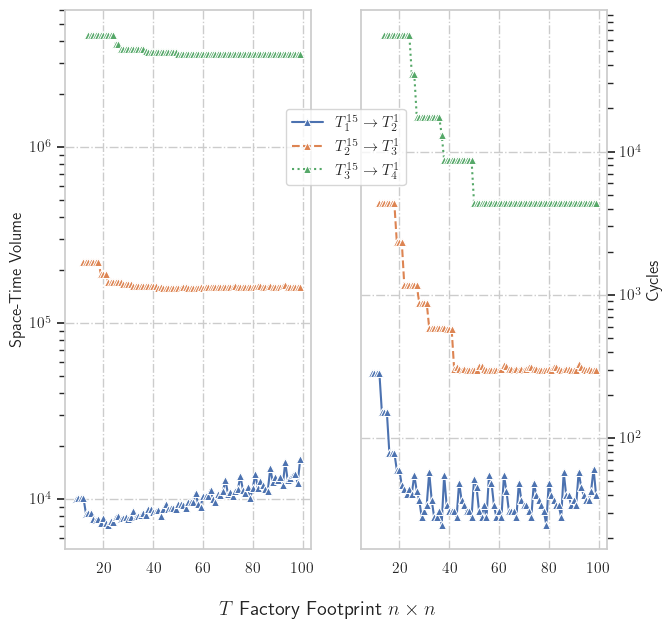

In [11]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

#f, ax = plt.subplots(figsize=(7, 7))


sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#plt.grid(True,which="both")  


marks = ['', '.', 'x', '*']
linestyles = ['-', '--', ':']

res = results_nest
targ_key = 'dist'

dependent = 'volume'
independent = 'size'
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

ax = [
    plt.subplot2grid((1, 2), (0, 0), colspan=1),
    plt.subplot2grid((1, 2), (0, 1), colspan=1)
]

subplot = ax[0]
kwargs = {
'errorbar':('ci', 100)
}

for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'DAG$_{target}$',
        linestyle=linestyles[idx],
        marker='^',
        **kwargs
    )


subplot.legend_.remove()
subplot.yaxis.set_label_position("left")
subplot.yaxis.tick_left()
subplot.set_yscale('log')
subplot.set_ylabel('Space-Time Volume')

dependent = 'runtime'

subplot = ax[1]
for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'$T^{{15}}_{{{target}}} \\rightarrow T^{{1}}_{{{target + 1}}}$',
        linestyle=linestyles[idx],
        marker='^',
        **kwargs
    )
    
subplot.legend_.remove()
subplot.yaxis.set_label_position("right")
subplot.yaxis.tick_right()
subplot.set_yscale('log')
subplot.set_ylabel('Cycles')

fig = plt.gcf()
fig.set_size_inches(7, 7)

lines = linestyles * 3

handles, labels = subplot.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper left', bbox_to_anchor=(0.43, 0.75))

fig.supxlabel('$T$ Factory Footprint $n \\times n$')

#plt.savefig('nested_factories.pdf')


In [2]:
size_min = 4
size_max = 32

scan_range = list(range(size_min, size_max + 1))

results = {i : {'height':[], 'runtime':[], 'volume':[], 'delays':[], 'width':[]} for i in scan_range}

for j in scan_range:
    for i in scan_range:
        try:
            qcb = T_Factory(height=i, width=j)
            results[i]['height'].append(i)
            results[i]['width'].append(j)
            results[i]['runtime'].append(qcb.n_cycles())
            results[i]['volume'].append(qcb.space_time_volume())
            results[i]['delays'].append(qcb.delays())
            print("\r Constructed: ", i, j, " " * 10, flush=True, end='')

        except:
            print("\r Failed: ", i, j, " " * 10, flush=True, end='')

            pass

results_zero_profile = results

4 4
5 4
6 4
7 4
4 5
5 5
4 6
4 7
4 8


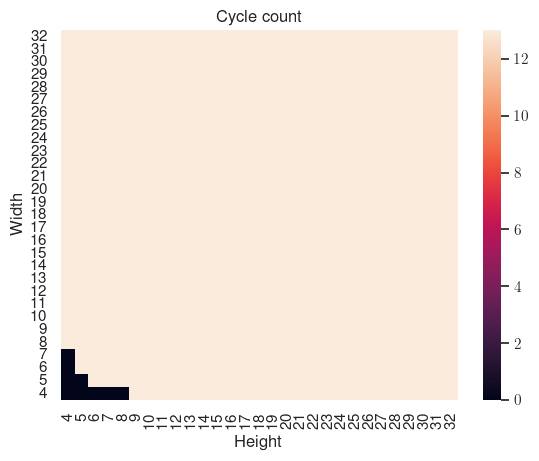

In [3]:
results = results_zero_profile

size = len(scan_range)
hmap_runtime = np.zeros((size, size))
hmap_volume = np.zeros((size, size))
hmap_route = np.zeros((size, size))
hmap_factory = np.zeros((size, size))
for i in results_zero_profile:
    for height, width, runtime, volume, delays in zip(
            results[i]['height'],
            results[i]['width'], 
            results[i]['runtime'], 
            results[i]['volume'],
            results[i]['delays']):
        
        hmap_runtime[height - size_min][width - size_min] = runtime
        hmap_volume[height - size_min][width - size_min] = volume
        if 'ROUTE' in delays:
            hmap_route[height - size_min][width - size_min] = delays['ROUTE']
        if 'T_Factory' in delays:
            hmap_factory[height - size_min][width - size_min] = delays['T_Factory']

ax = sbs.heatmap(hmap_runtime, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Cycle count")
ax.invert_yaxis()

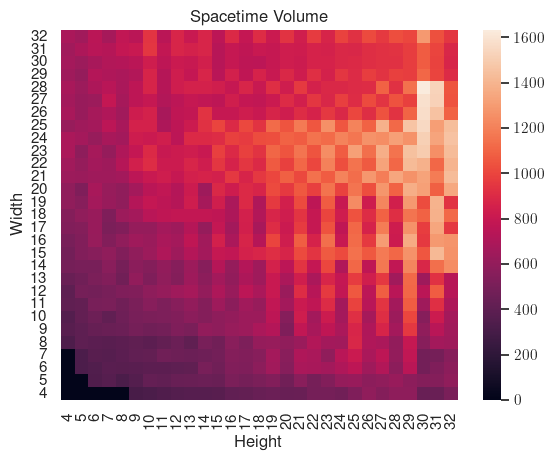

In [4]:
ax = sbs.heatmap(hmap_volume, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Spacetime Volume")
ax.invert_yaxis()

In [5]:
min_vol = min(min(zip(obj['volume'], obj['height'], obj['width'])) for obj in results_zero_profile.values())
min_foot = min(min(zip(map(lambda x: x[0] * x[1], zip(obj['height'], obj['width'])), obj['volume'], obj['height'], obj['width'])) for obj in results_zero_profile.values())

min_vol_l1_fact = T_Factory(height=min_vol[1], width=min_vol[2])
min_vol_l1_gate = T_gate(factory=min_vol_l1_fact)

min_foot_l1_fact = T_Factory(height=min_foot[2], width=min_foot[2])
min_foot_l1_gate = T_gate(factory=min_foot_l1_fact)

In [6]:
size_min = 16
size_max = 64

scan_range = list(range(size_min, size_max + 1, 4))

results = {i : {'height':[], 'runtime':[], 'volume':[], 'delays':[], 'width':[]} for i in scan_range}

fact = min_vol_l1_fact
gate = T_gate(factory=fact)

for j in scan_range:
    for i in scan_range:
        try:
            qcb = T_Factory(fact, height=i, width=j, t_gate=gate)
            results[i]['height'].append(i)
            results[i]['width'].append(j)
            results[i]['runtime'].append(qcb.n_cycles())
            results[i]['volume'].append(qcb.space_time_volume())
            results[i]['delays'].append(qcb.delays())
            print("\r Constructed: ", i, j, " " * 10, flush=True, end='')
        except:
            print("\r Failed: ", i, j, " " * 10, flush=True, end='')
            pass

results_one_profile = results

 Constructed:  64 64           

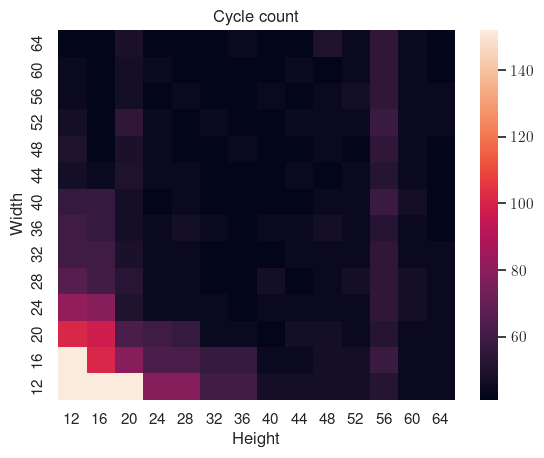

In [26]:
results = results_one_profile

size = len(scan_range)
scan_map = {j:i for i, j in enumerate(scan_range)}


hmap_runtime = np.zeros((size, size))
hmap_volume = np.zeros((size, size))
hmap_route = np.zeros((size, size))
hmap_factory = np.zeros((size, size))

for i in scan_range:
    for height, width, runtime, volume, delays in zip(
            results[i]['height'],
            results[i]['width'], 
            results[i]['runtime'], 
            results[i]['volume'],
            results[i]['delays']):
        
        hmap_runtime[scan_map[height]][scan_map[width]] = runtime
        hmap_volume[scan_map[height]][scan_map[width]] = volume
        if 'ROUTE' in delays:
            hmap_route[scan_map[height]][scan_map[width]] = delays['ROUTE']
        if 'T_Factory' in delays:
            hmap_factory[scan_map[height]][scan_map[width]] = delays['T_Factory']

# Rerun and remove
hmap_runtime[9][0] = np.mean(hmap_runtime)

ax = sbs.heatmap(hmap_runtime, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Cycle count")
ax.invert_yaxis()

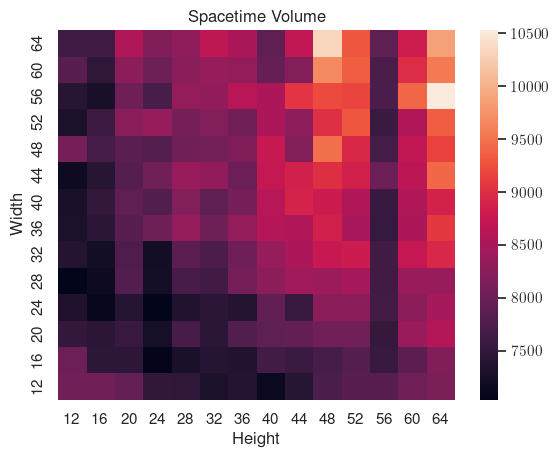

In [27]:
# Rerun and remove
hmap_volume[9][0] = np.mean(hmap_volume)

ax = sbs.heatmap(hmap_volume, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Spacetime Volume")
ax.invert_yaxis()

In [28]:
size_min = 16
size_max = 64

scan_range = list(range(size_min, size_max + 1, 4))

results = {i : {'height':[], 'runtime':[], 'volume':[], 'delays':[], 'width':[]} for i in scan_range}

fact = min_foot_l1_fact
gate = T_gate(factory=fact)

for j in scan_range:
    for i in scan_range:
        try:
            qcb = T_Factory(fact, height=i, width=j, t_gate=gate)
            results[i]['height'].append(i)
            results[i]['width'].append(j)
            results[i]['runtime'].append(qcb.n_cycles())
            results[i]['volume'].append(qcb.space_time_volume())
            results[i]['delays'].append(qcb.delays())
            print("\r Constructed: ", i, j, " " * 10, flush=True, end='')
        except:
            print("\r Failed: ", i, j, " " * 10, flush=True, end='')
            pass

results_one_foot_profile = results

 Constructed:  64 64           

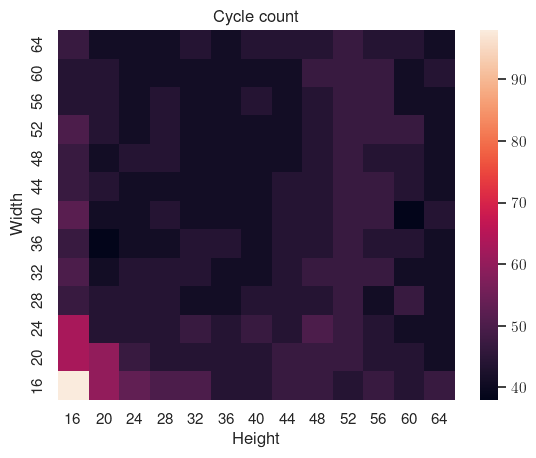

In [29]:
results = results_one_foot_profile

size = len(scan_range)
scan_map = {j:i for i, j in enumerate(scan_range)}


hmap_runtime = np.zeros((size, size))
hmap_volume = np.zeros((size, size))
hmap_route = np.zeros((size, size))
hmap_factory = np.zeros((size, size))

for i in scan_range:
    for height, width, runtime, volume, delays in zip(
            results[i]['height'],
            results[i]['width'], 
            results[i]['runtime'], 
            results[i]['volume'],
            results[i]['delays']):
        
        hmap_runtime[scan_map[height]][scan_map[width]] = runtime
        hmap_volume[scan_map[height]][scan_map[width]] = volume
        if 'ROUTE' in delays:
            hmap_route[scan_map[height]][scan_map[width]] = delays['ROUTE']
        if 'T_Factory' in delays:
            hmap_factory[scan_map[height]][scan_map[width]] = delays['T_Factory']


ax = sbs.heatmap(hmap_runtime, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Cycle count")
ax.invert_yaxis()

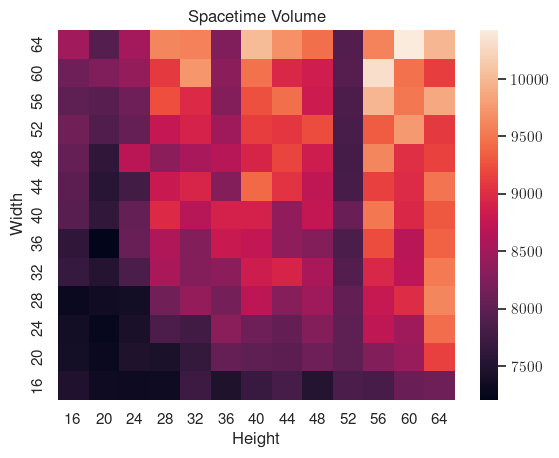

In [30]:
# Rerun and remove
ax = sbs.heatmap(hmap_volume, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Spacetime Volume")
ax.invert_yaxis()

In [32]:
min_vol = min(min(zip(obj['volume'], obj['height'], obj['width'])) for obj in results_one_foot_profile.values())
min_foot = min(min(zip(map(lambda x: x[0] * x[1], zip(obj['height'], obj['width'])), obj['volume'], obj['height'], obj['width'])) for obj in results_zero_profile.values())

min_vol_l2_fact = T_Factory(fact, height=min_vol[1], width=min_vol[2], t_gate=gate)
min_foot_l2_fact = T_Factory(fact, height=min_foot[2], width=min_foot[3], t_gate=gate)

In [45]:
size_min = 16
size_max = 128

scan_range = list(range(size_min, size_max + 1, 8))

results = {i : {'height':[], 'runtime':[], 'volume':[], 'delays':[], 'width':[]} for i in scan_range}

fact = min_foot_l2_fact
gate = T_gate(factory=fact)

for j in scan_range:
    for i in scan_range:
        try:
            qcb = T_Factory(fact, height=i, width=j, t_gate=gate)
            results[i]['height'].append(i)
            results[i]['width'].append(j)
            results[i]['runtime'].append(qcb.n_cycles())
            results[i]['volume'].append(qcb.space_time_volume())
            results[i]['delays'].append(qcb.delays())
            print("\r Constructed: ", i, j, " " * 10, flush=True, end='')
        except:
            print("\r Failed: ", i, j, " " * 10, flush=True, end='')
            pass

results_two_foot_profile = results

 Failed:  128 128               

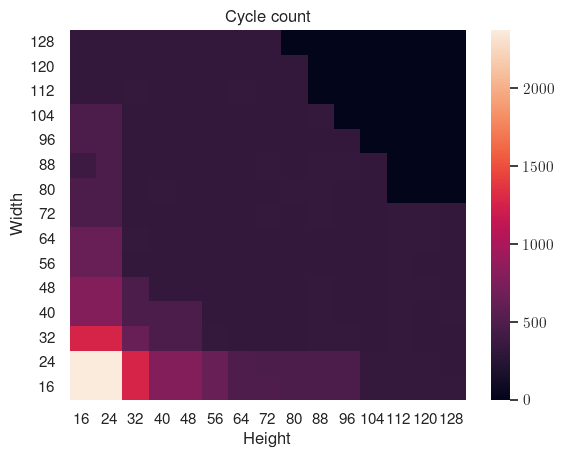

In [46]:
results = results_two_foot_profile

size = len(scan_range)
scan_map = {j:i for i, j in enumerate(scan_range)}


hmap_runtime = np.zeros((size, size))
hmap_volume = np.zeros((size, size))
hmap_route = np.zeros((size, size))
hmap_factory = np.zeros((size, size))

for i in scan_range:
    for height, width, runtime, volume, delays in zip(
            results[i]['height'],
            results[i]['width'], 
            results[i]['runtime'], 
            results[i]['volume'],
            results[i]['delays']):
        
        hmap_runtime[scan_map[height]][scan_map[width]] = runtime
        hmap_volume[scan_map[height]][scan_map[width]] = volume
        if 'ROUTE' in delays:
            hmap_route[scan_map[height]][scan_map[width]] = delays['ROUTE']
        if 'T_Factory' in delays:
            hmap_factory[scan_map[height]][scan_map[width]] = delays['T_Factory']

# Rerun and remove
hmap_runtime[9][0] = np.mean(hmap_runtime)

ax = sbs.heatmap(hmap_runtime, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Cycle count")
ax.invert_yaxis()

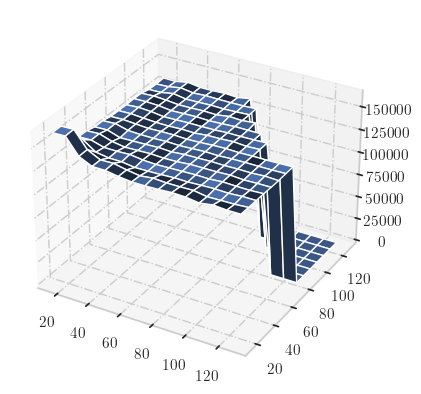

In [58]:
X, Y = np.meshgrid(scan_range, scan_range)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, hmap_volume)

In [66]:
min_vol = min(min(zip(obj['volume'], obj['height'], obj['width'])) for obj in results_two_foot_profile.values())
min_foot = min(min(zip(map(lambda x: x[0] * x[1], zip(obj['height'], obj['width'])), obj['volume'], obj['height'], obj['width'])) for obj in results_two_foot_profile.values())

min_vol_l3_fact = T_Factory(fact, height=min_vol[1], width=min_vol[2], t_gate=gate)
min_foot_l3_fact = T_Factory(fact, height=min_foot[2], width=min_foot[3], t_gate=gate)

In [73]:
min_vol_l3_fact.height

120

In [ ]:
size_min = 16
size_max = 256

scan_range = list(range(size_min, size_max + 1, 16))

results = {i : {'height':[], 'runtime':[], 'volume':[], 'delays':[], 'width':[]} for i in scan_range}

fact = min_foot_l3_fact
gate = T_gate(factory=fact)

for j in scan_range:
    for i in scan_range:
        try:
            print("\r Constructing: ", i, j, " " * 10, flush=True, end='')

            qcb = T_Factory(fact, height=i, width=j, t_gate=gate)
            results[i]['height'].append(i)
            results[i]['width'].append(j)
            results[i]['runtime'].append(qcb.n_cycles())
            results[i]['volume'].append(qcb.space_time_volume())
            results[i]['delays'].append(qcb.delays())
            print("\r Constructed: ", i, j, " " * 10, flush=True, end='')
        except:
            print("\r Failed: ", i, j, " " * 10, flush=True, end='')
            pass

results_three_foot_profile = results

 Failed:  224 128               

In [9]:
fact = T_Factory()
t_gate = T_gate(factory=fact)

sizes = list(range(10, 66, 2))
results = {i : {'height':[], 'runtime':[], 'volume':[], 'delays':[]} for i in sizes}

for i in sizes:
    qcb = T_Factory(fact, height=i, width=i, t_gate=t_gate)
    results[i]['height'].append(i)
    results[i]['runtime'].append(qcb.n_cycles())
    results[i]['volume'].append(qcb.space_time_volume())
    results[i]['delays'].append(qcb.delays())

results_one = results

In [62]:
fact = T_Factory(height=5, width=8)
t_gate = T_gate(factory=fact)

size_min = 10
size_max = 32

scan_range = list(range(size_min, size_max + 1))

results = {i : {'height':[], 'runtime':[], 'volume':[], 'delays':[], 'width':[]} for i in scan_range}

for j in scan_range:
    for i in scan_range:
        qcb = T_Factory(fact, height=i, width=j, t_gate=t_gate)
        results[i]['height'].append(i)
        results[i]['width'].append(j)
        results[i]['runtime'].append(qcb.n_cycles())
        results[i]['volume'].append(qcb.space_time_volume())
        results[i]['delays'].append(qcb.delays())

results_one_profile = results

In [95]:
size = len(scan_range)
hmap_runtime = np.zeros((size, size))
hmap_volume = np.zeros((size, size))
hmap_route = np.zeros((size, size))
hmap_factory = np.zeros((size, size))
for i in results_one_profile:
    for j, runtime, volume, delays in zip(
            results_one_profile[i]['width'], 
            results_one_profile[i]['runtime'], 
            results_one_profile[i]['volume'],
            results_one_profile[i]['delays']):
        hmap_runtime[i - size_min][j - size_min] = runtime
        hmap_volume[i - size_min][j - size_min] = volume
        if 'ROUTE' in delays:
            hmap_route[i - size_min][j - size_min] = delays['ROUTE']
        if 'T_Factory' in delays:
            hmap_factory[i - size_min][j - size_min] = delays['T_Factory']    

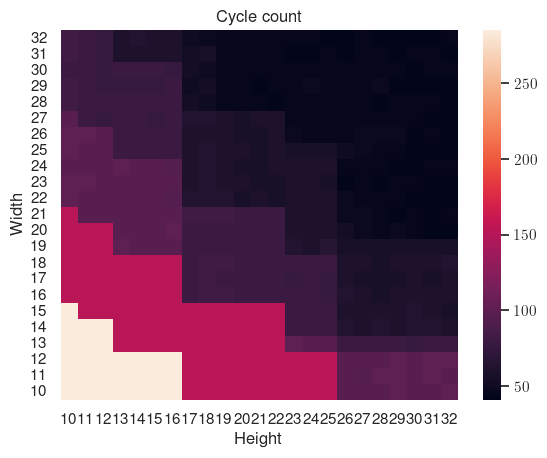

In [107]:
ax = sbs.heatmap(hmap_runtime, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Cycle count")
ax.invert_yaxis()

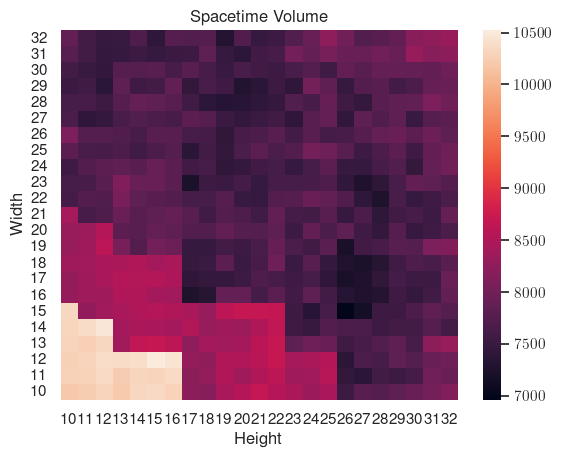

In [108]:
ax = sbs.heatmap(hmap_volume, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Spacetime Volume")
ax.invert_yaxis()

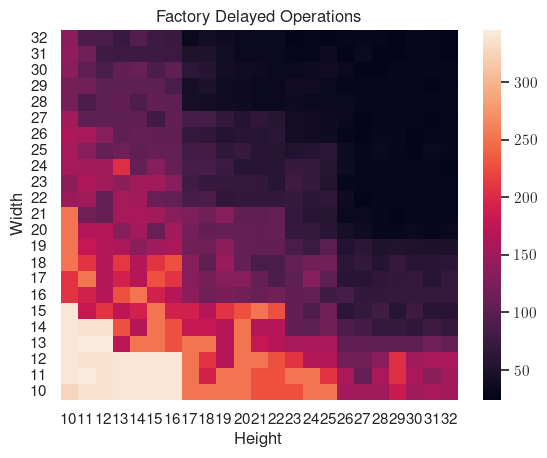

In [109]:
ax = sbs.heatmap(hmap_factory, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Factory Delayed Operations")
ax.invert_yaxis()

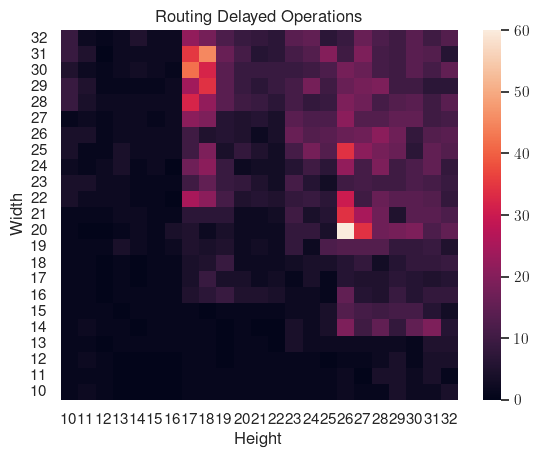

In [110]:
ax = sbs.heatmap(hmap_route, xticklabels=scan_range, yticklabels=scan_range)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title("Routing Delayed Operations")
ax.invert_yaxis()

In [ ]:
fact = T_Factory(factory = )
t_gate = T_gate(factory=fact)

sizes = list(range(10, 66, 2))
results = {i : {'height':[], 'runtime':[], 'volume':[], 'delays':[]} for i in sizes}

for i in sizes:
    qcb = T_Factory(fact, height=i, width=i, t_gate=t_gate)
    results[i]['height'].append(i)
    results[i]['runtime'].append(qcb.n_cycles())
    results[i]['volume'].append(qcb.space_time_volume())
    results[i]['delays'].append(qcb.delays())

results_one = results

In [ ]:
results_nest_opt = {'dist': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 'runtime': [285,
  285,
  285,
  285,
  152,
  152,
  152,
  79,
  79,
  79,
  60,
  60,
  47,
  44,
  41,
  44,
  41,
  55,
  43,
  37,
  28,
  31,
  34,
  58,
  37,
  28,
  28,
  31,
  25,
  55,
  34,
  31,
  31,
  31,
  28,
  49,
  37,
  34,
  31,
  31,
  28,
  52,
  46,
  31,
  28,
  34,
  28,
  55,
  49,
  34,
  28,
  31,
  28,
  55,
  43,
  31,
  31,
  31,
  28,
  49,
  37,
  34,
  34,
  31,
  28,
  49,
  40,
  37,
  34,
  31,
  25,
  49,
  40,
  37,
  34,
  34,
  28,
  58,
  40,
  40,
  34,
  37,
  34,
  58,
  46,
  40,
  37,
  37,
  43,
  61,
  40,
  4365,
  4365,
  4365,
  4365,
  4365,
  4365,
  4365,
  2328,
  2328,
  2328,
  1170,
  1170,
  1164,
  1167,
  1164,
  1167,
  879,
  879,
  876,
  876,
  588,
  588,
  588,
  585,
  588,
  585,
  585,
  582,
  582,
  582,
  306,
  312,
  306,
  300,
  303,
  300,
  300,
  297,
  300,
  300,
  321,
  318,
  306,
  300,
  297,
  297,
  297,
  300,
  300,
  303,
  324,
  318,
  306,
  303,
  300,
  303,
  300,
  303,
  300,
  303,
  315,
  312,
  306,
  303,
  300,
  300,
  297,
  300,
  303,
  300,
  315,
  312,
  303,
  300,
  300,
  303,
  303,
  300,
  300,
  300,
  327,
  315,
  303,
  300,
  303,
  300,
  300,
  300,
  65565,
  65565,
  65565,
  65565,
  65565,
  65565,
  65565,
  65565,
  65565,
  65565,
  65565,
  34968,
  34968,
  17490,
  17487,
  17487,
  17487,
  17487,
  17487,
  17487,
  17487,
  17487,
  17487,
  13119,
  8751,
  8751,
  8748,
  8745,
  8748,
  8745,
  8745,
  8748,
  8745,
  8745,
  8745,
  8745,
  4395,
  4398,
  4386,
  4380,
  4380,
  4383,
  4377,
  4380,
  4383,
  4380,
  4380,
  4380,
  4404,
  4401,
  4383,
  4380,
  4380,
  4380,
  4380,
  4380,
  4380,
  4380,
  4380,
  4380,
  4398,
  4392,
  4383,
  4380,
  4380,
  4383,
  4377,
  4377,
  4383,
  4377,
  4380,
  4377,
  4401,
  4395,
  4386,
  4383,
  4380,
  4380,
  4380,
  4383,
  4380,
  4380,
  4380,
  4380,
  4407,
  4401],
 'volume': [10009,
  10037,
  10072,
  10098,
  8190,
  8330,
  8338,
  7637,
  7567,
  7627,
  7241,
  7769,
  7318,
  7131,
  7441,
  7371,
  7893,
  8006,
  7625,
  7720,
  7911,
  7622,
  7896,
  8471,
  7905,
  7923,
  8111,
  8277,
  8105,
  8687,
  8686,
  8445,
  8495,
  8645,
  7994,
  8743,
  9300,
  8782,
  8891,
  8891,
  8767,
  9349,
  9267,
  9179,
  8829,
  9515,
  9575,
  9635,
  10761,
  9386,
  8929,
  10376,
  10387,
  10337,
  11253,
  9950,
  9589,
  10593,
  10556,
  11107,
  12712,
  10685,
  10983,
  10304,
  11110,
  11343,
  13416,
  11268,
  10762,
  11597,
  10141,
  11511,
  13867,
  11461,
  12578,
  11951,
  11413,
  11108,
  14888,
  12443,
  13232,
  12833,
  13225,
  11903,
  16113,
  12708,
  13092,
  13609,
  13841,
  12251,
  16760,
  220751,
  220837,
  220880,
  220987,
  221085,
  221174,
  221426,
  188841,
  188965,
  189063,
  170610,
  170821,
  170765,
  170363,
  170567,
  170485,
  166571,
  166625,
  166514,
  166877,
  162028,
  162106,
  162432,
  161996,
  162058,
  162250,
  162266,
  162542,
  162599,
  162372,
  157995,
  158870,
  157993,
  158072,
  158642,
  158198,
  157974,
  158095,
  158203,
  158669,
  159005,
  159205,
  158395,
  158301,
  158472,
  158485,
  158558,
  159106,
  158587,
  159009,
  159470,
  159892,
  159636,
  159656,
  159825,
  159952,
  159697,
  159314,
  159568,
  159892,
  160658,
  162435,
  160086,
  159705,
  159903,
  159401,
  159405,
  159726,
  159331,
  159635,
  161534,
  162747,
  160242,
  159848,
  160150,
  161062,
  160370,
  159874,
  160080,
  160077,
  160956,
  163532,
  160829,
  160112,
  160619,
  160242,
  160108,
  160857,
  4360576,
  4360654,
  4360657,
  4360874,
  4360903,
  4361053,
  4361048,
  4361248,
  4361500,
  4361474,
  4361597,
  3871973,
  3872124,
  3592823,
  3592436,
  3592796,
  3592373,
  3592660,
  3592857,
  3592726,
  3592942,
  3592860,
  3593434,
  3524184,
  3453774,
  3453873,
  3453268,
  3453365,
  3454647,
  3454138,
  3454241,
  3453962,
  3453390,
  3453964,
  3453901,
  3454592,
  3384916,
  3385012,
  3384645,
  3385038,
  3384542,
  3384451,
  3384145,
  3384554,
  3384380,
  3384496,
  3384548,
  3385155,
  3385736,
  3385437,
  3384532,
  3384959,
  3384896,
  3384962,
  3384971,
  3384709,
  3384872,
  3384729,
  3385358,
  3385609,
  3385921,
  3387376,
  3385525,
  3385379,
  3385702,
  3385498,
  3385353,
  3385387,
  3385450,
  3385070,
  3385166,
  3386179,
  3386975,
  3388135,
  3386333,
  3385899,
  3386695,
  3386525,
  3385659,
  3386441,
  3385236,
  3385961,
  3385442,
  3386476,
  3387378,
  3388616],
 'size': [9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99]}